# Ensemble

Todo:

- Remove max evals here - it doesn't work
- Old dates with zeros in data can lead to many errors
- required date not in csv/data source? data validation

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import json

from datetime import datetime, timedelta

from nb_utils import train_eval_plot_ensemble

In [26]:
with open('../config/sample_homogeneous_train_config.json') as f_train, \
    open('../config/sample_homogeneous_test_config.json') as f_test, \
    open('../config/sample_homogeneous_forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

In [19]:
model_class = 'homogeneous_ensemble'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

In [20]:
current_day = datetime.now().date() - timedelta(30) # Forecast starts from the day after current day
forecast_length = 30 # Length of forecast interval (days)

### Inputs to train-eval-plot

In [21]:
region = ['pune']
region_type = 'district'

current_day = datetime.now().date() - timedelta(60)
forecast_length = 30

name_prefix = region
print(current_day)

2020-05-16


### Train eval plot

100%|██████████| 10/10 [00:00<00:00, 24.14trial/s, best loss: 20.06725661137868]
Best fit: {'beta': 0.08079640571498281}
Best Loss: 20.06725661137868
t = 15.90
t = 15.90
100%|██████████| 10/10 [00:00<00:00, 15.94trial/s, best loss: 49.448202284506145]
Best fit: {'beta': 0.5477694838969356}
Best Loss: 49.448202284506145
{'data_source': 'tracker_district_daily', 'region_name': [], 'region_type': '', 'run_day': '', 'forecast_start_date': '', 'forecast_end_date': '', 'model_class': 'homogeneous_ensemble', 'forecast_variables': ['confirmed', 'recovered', 'deceased'], 'model_parameters': {'child_model': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}}, 'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean_predictions'}, 'constituent_models': {'0': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio': 28.16604550441872, 'F_fatalities': 0.02466701801276612, 'F_hospitalization': 0.069635076064192

/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


{'data_source': 'tracker_district_daily', 'region_name': [], 'region_type': '', 'run_day': '', 'forecast_start_date': '', 'forecast_end_date': '', 'model_class': 'homogeneous_ensemble', 'forecast_variables': ['confirmed', 'recovered', 'deceased'], 'model_parameters': {'child_model': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}}, 'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean_predictions'}, 'constituent_models': {'0': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio': 28.16604550441872, 'F_fatalities': 0.02466701801276612, 'F_hospitalization': 0.06963507606419204, 'IbyCRatio': 1.4785269422997283, 'infectious_period': 5.42824969419175, 'r0': 2.0045875407735303, 'LatentEbyCRatio': {'5/27/20': 28.16604550441872, '6/3/20': 1.6812382970858852}, 'LatentIbyCRatio': {'5/27/20': 1.4785269422997283, '6/3/20': 0.26879511010742685}}}, '1': {'model_class': 'SEIHRD', 'model_parameters': {'

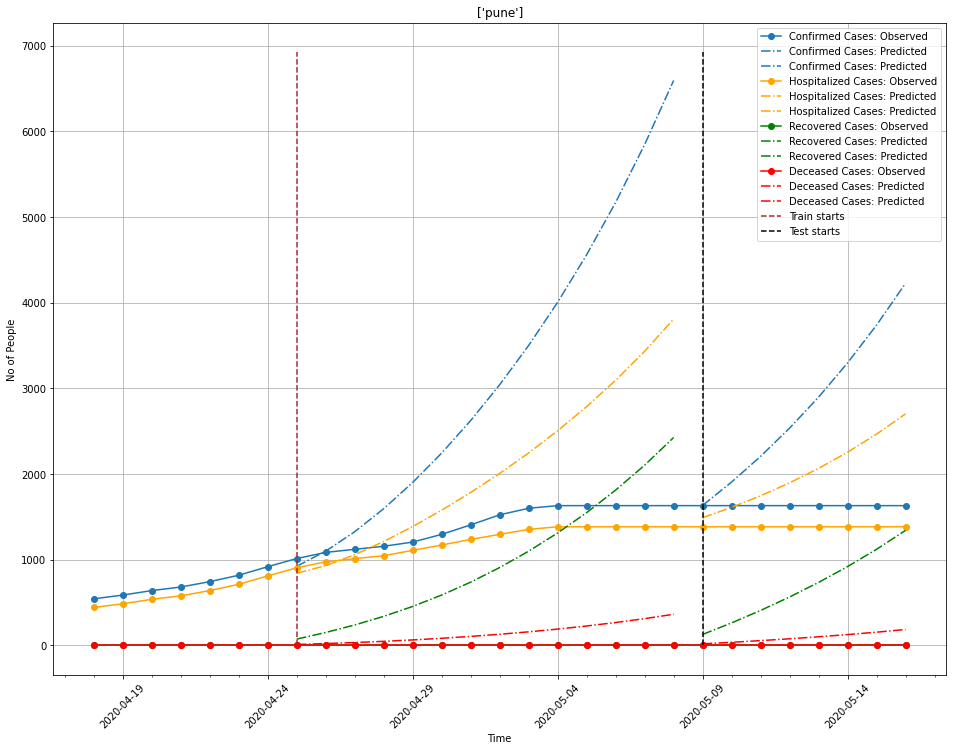

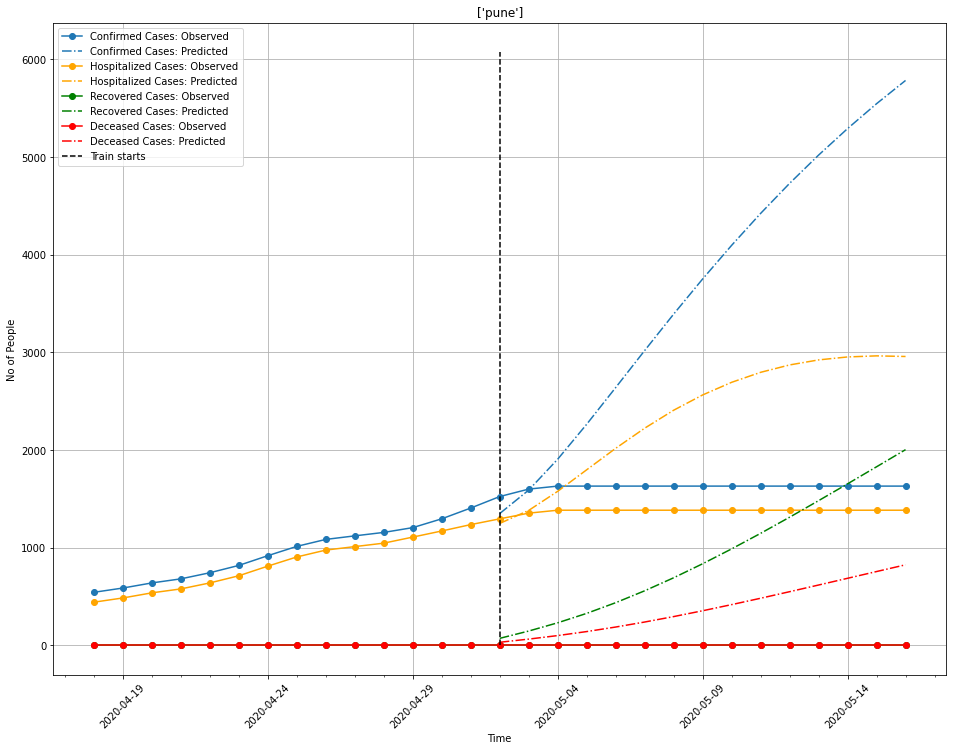

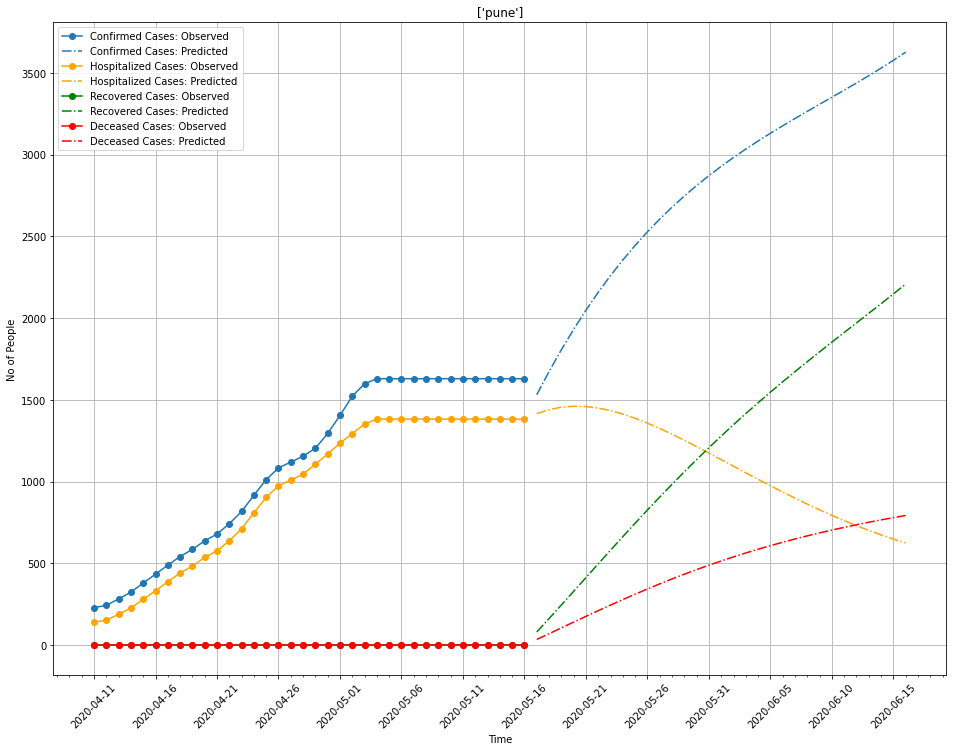

In [27]:
# remove max_evals here, it doesn't work
train_eval_plot_ensemble(region, region_type, 
                         current_day, forecast_length,
                         default_train_config, default_test_config, default_forecast_config,
                         train_period = 14, test_period = 7,
                         max_evals = 100, data_source = 'direct_csv', input_filepath = '../data/pune_data.csv',
                         mlflow_log = False, mlflow_run_name = "Ensemble testing")